In [1]:
import torch
import torchvision
import torchvision.datasets as datasets
import torch.nn as nn
import torch.optim as optim
torch.random.seed = 42

import numpy as np

import random
import gc

import matplotlib.pyplot as plt
%matplotlib inline

## Load the MNIST dataset

In [2]:
mnist_trainset = datasets.MNIST(root='../data', train=True, download=True,
                                transform=None)

mnist_testset = datasets.MNIST(root='../data', train=False, download=True,
                               transform=None)

In [3]:
print(mnist_trainset)
print('')
print(mnist_testset)

Dataset MNIST
    Number of datapoints: 60000
    Split: train
    Root Location: ../data
    Transforms (if any): None
    Target Transforms (if any): None

Dataset MNIST
    Number of datapoints: 10000
    Split: test
    Root Location: ../data
    Transforms (if any): None
    Target Transforms (if any): None


In [4]:
mnist_trainset.data[0].size()

torch.Size([28, 28])

In [5]:
size_len = mnist_trainset.data[0].size()[0]

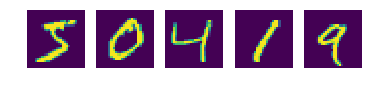

In [6]:
fig = plt.figure(1)
for i, img in enumerate(mnist_trainset.data[0:5]):
    ax = fig.add_subplot(1,5,i+1)
    ax.set_axis_off()
    ax = plt.imshow(img)
plt.show()

## Net architecture and train/test routines

In [7]:
class Net(nn.Module):
    """MLP with 4 ReLU hidden layers and 1 softmax output layer"""
    
    def __init__(self, H, C):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(size_len*size_len, H)
        self.fc2 = nn.Linear(H, H)
        self.fc3 = nn.Linear(H, H)
        self.fc4 = nn.Linear(H, H)
        self.fc5 = nn.Linear(H, C)
        self.relu = nn.ReLU()
        self.softmax = nn.LogSoftmax(dim=1)
        
    def forward(self, x):
        x = x.view(-1, size_len*size_len)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.relu(self.fc4(x))
        x = self.softmax(self.fc5(x))
        return x

In [8]:
def train(model, x_train, y_train, optimizer, criterion, epoch, disp=''):
    model.train()
    
    optimizer.zero_grad()
    output = model(x_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()
    
    acc = (torch.sum((output.detach().max(dim=1)[1] == y_train), dtype=torch.float64))/len(y_train) 

    if disp=='print':
        print("Train Epoch: {}\tLoss: {:.6f}\tAccuracy: {:.6f}".format(epoch, loss.item(), acc))
    elif disp=='ret':
        return loss.item()
        

In [9]:
def test(model, x_test, y_test, criterion, disp='ret'):
    model.eval()

    with torch.no_grad():
        output = model(x_test)
        test_loss = criterion(output, y_test)
        acc = (torch.sum((output.detach().max(dim=1)[1] == y_test), dtype=torch.float64))/len(y_test)

    if disp=='print':
        print("\nTest set: Average loss: {:.4f}\tAccuracy: {:.6f}\n".format(test_loss.item(), acc))
    elif disp=='ret':
        return test_loss, acc


## Training

In [10]:
X_train = mnist_trainset.data.float()
y_train = mnist_trainset.targets

X_test = mnist_testset.data.float()
y_test = mnist_testset.targets

Y_train = np.zeros((y_train.shape[0], 10))
for i, e in enumerate(y_train):
    Y_train[i,e] = 1
    
Y_test = np.zeros((y_test.shape[0], 10))
for i, e in enumerate(y_test):
    Y_test[i,e] = 1

### Hyperparameters

In [11]:
model = Net(200, 10)

In [12]:
alpha = 0.01
gamma = 10
max_epoch = 100
optimizer = optim.SGD(model.parameters(), lr=alpha)
criterion = torch.nn.NLLLoss()

In [13]:
epoch = count = 0

In [14]:
for epoch in range(100):
    train(model, X_train, y_train, optimizer, criterion, epoch, 'print')
#    test(model, X_test, y_test, criterion, 'print')

Train Epoch: 0	Loss: 2.772829	Accuracy: 0.125483
Train Epoch: 1	Loss: 2.323357	Accuracy: 0.212533
Train Epoch: 2	Loss: 1.905990	Accuracy: 0.369317
Train Epoch: 3	Loss: 1.706092	Accuracy: 0.489433
Train Epoch: 4	Loss: 1.544132	Accuracy: 0.558350
Train Epoch: 5	Loss: 1.450570	Accuracy: 0.571200
Train Epoch: 6	Loss: 1.513896	Accuracy: 0.528667
Train Epoch: 7	Loss: 1.746134	Accuracy: 0.458867
Train Epoch: 8	Loss: 1.463799	Accuracy: 0.560167
Train Epoch: 9	Loss: 1.149917	Accuracy: 0.644767
Train Epoch: 10	Loss: 1.044478	Accuracy: 0.684650
Train Epoch: 11	Loss: 1.176934	Accuracy: 0.647467
Train Epoch: 12	Loss: 1.016710	Accuracy: 0.668333
Train Epoch: 13	Loss: 1.029113	Accuracy: 0.665100
Train Epoch: 14	Loss: 0.869100	Accuracy: 0.730950
Train Epoch: 15	Loss: 0.821990	Accuracy: 0.742600
Train Epoch: 16	Loss: 0.740696	Accuracy: 0.779683
Train Epoch: 17	Loss: 0.739898	Accuracy: 0.770033
Train Epoch: 18	Loss: 0.696768	Accuracy: 0.781767
Train Epoch: 19	Loss: 0.744893	Accuracy: 0.756483
Train Epoc

In [15]:
test(model, X_test, y_test, criterion, 'print')


Test set: Average loss: 0.2480	Accuracy: 0.923500



In [16]:
gc.collect()

410

In [18]:
model = Net(400, 10)
optimizer = optim.Adam(model.parameters())
min_error = 999
epoch = count = 0
train_loss_vec = []
test_loss_vec = []

while (epoch < 100 and count < 30):
    train_loss = train(model, X_train, y_train, optimizer, criterion, epoch, 'ret')
    test_loss, _ = test(model, X_test, y_test, criterion, 'ret')
    train_loss_vec.append(train_loss)
    test_loss_vec.append(test_loss)
    epoch += 1
    if test_loss >= min_error:
        count += 1
    else:
        min_error = test_loss
        
test(model, X_test, y_test, criterion, 'print')


Test set: Average loss: 0.0861	Accuracy: 0.974800



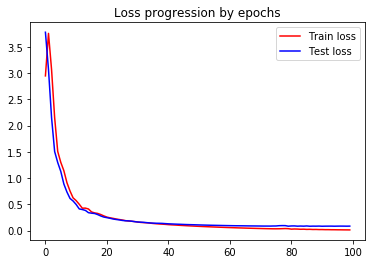

In [19]:
plt.plot(train_loss_vec, "r")
plt.hold = True
plt.plot(test_loss_vec, "b")
plt.hold = False
plt.title("Loss progression by epochs")
plt.legend(["Train loss", "Test loss"])
plt.show()

In [20]:
gc.collect()

2687

7 - seven
2 - two
1 - one
0 - zero
4 - four
1 - one
4 - four
9 - nine
5 - five
9 - nine


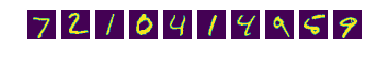

In [21]:
fig = plt.figure(1)
for i, img in enumerate(X_test[:10]):
    ax = fig.add_subplot(1,10,i+1)
    ax.set_axis_off()
    ax = plt.imshow(img)
    with torch.no_grad():
        a = model(img)
    print(mnist_testset.classes[torch.argmax(a, dim=1)])
plt.show()

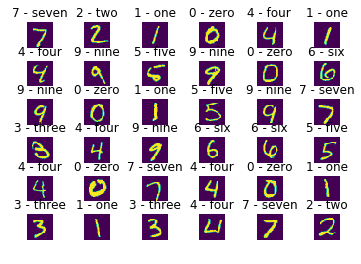

In [22]:
fig = plt.figure(1)
fig.subplots_adjust(hspace=.5)

for i, img in enumerate(X_test[:36]):
    with torch.no_grad():
        a = model(img)
        
    ax = fig.add_subplot(6,6,i+1)
    ax.set_axis_off()
    ax.set_title(mnist_testset.classes[torch.argmax(a, dim=1)])
    ax = plt.imshow(img)


plt.show()

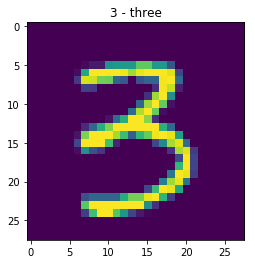

In [23]:
r = random.randint(0,1000)

img = X_test[r]

with torch.no_grad():
    a = model(img)
    
plt.title(mnist_testset.classes[torch.argmax(a, dim=1)])
plt.imshow(img)
plt.show()

In [31]:
def kfold(k, N, epochs, model):
    optimizer = optim.Adam(model.parameters())
    loss_avg = 0
    acc_avg = 0
    for i in range(k):
        epoch = 0
        count = 0
        min_error = 0
        while (epoch < epochs and count < epochs/10):
            train(model, X_train[i*(int(N/k)):(i+1)*(int(N/k))], y_train[i*(int(N/k)):(i+1)*(int(N/k))], optimizer, criterion, epoch, '')
            test_loss, test_acc = test(model, X_test, y_test, criterion, 'ret')
            epoch += 1
            if test_loss >= min_error:
                count += 1
            else:
                min_error = test_loss
            print('.', end='')
        loss_avg += test_loss.detach()
        acc_avg += test_acc
        print('|', end='')
    print('>')
    return loss_avg/k, test_acc/k

In [32]:
models = []
for _ in range(6):
    H = random.randint(100,600)
    model = Net(H, 10)
    loss, acc = kfold(5, 60000, 100, model)
    models.append((H, loss, acc))        

..........|..........|..........|..........|..........|>
..........|..........|..........|..........|..........|>
..........|..........|..........|..........|..........|>
..........|..........|..........|..........|..........|>
..........|..........|..........|..........|..........|>
..........|..........|..........|..........|..........|>


In [33]:
gc.collect()

224

In [34]:
models

[(475, tensor(0.3960), tensor(0.1908, dtype=torch.float64)),
 (195, tensor(0.2693), tensor(0.1911, dtype=torch.float64)),
 (314, tensor(0.2104), tensor(0.1929, dtype=torch.float64)),
 (122, tensor(0.2520), tensor(0.1912, dtype=torch.float64)),
 (321, tensor(0.3375), tensor(0.1905, dtype=torch.float64)),
 (174, tensor(0.2879), tensor(0.1913, dtype=torch.float64))]